<a href="https://colab.research.google.com/github/nrshaidat/facial_detection/blob/master/classcascade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import sqlite3
import json

conn = sqlite3.connect('faces.db')
c = conn.cursor()
# When using SQLite, include the following line to ensure foreign key commands are recognized
c.execute('PRAGMA foreign_keys = ON')
command1 = '''
SELECT
  *
FROM
  face
ORDER BY name ASC;
'''

# Do not modify below this line
c.execute(command1)
count = 0
thisdict = {}
for row in c:
  count += 1
  resp_dict = json.loads(row[0])
  if row[1] == 'img86.jpg':
    continue
  thisdict[row[1]] = []
  for value in resp_dict.get('objects'):
    box = []
    box.append(value['bbox']['left'])
    box.append(value['bbox']['top'])
    box.append(value['bbox']['width'])
    box.append(value['bbox']['height'])
    thisdict[row[1]].append(box)
  #thisdict[row[1]]=box
print(thisdict['img31.jpg'])

[[22, 77, 180, 221], [236, 103, 202, 215]]


In [2]:
!pip install opencv-python

[168 773 131 131]
[ 72 776 134 134]


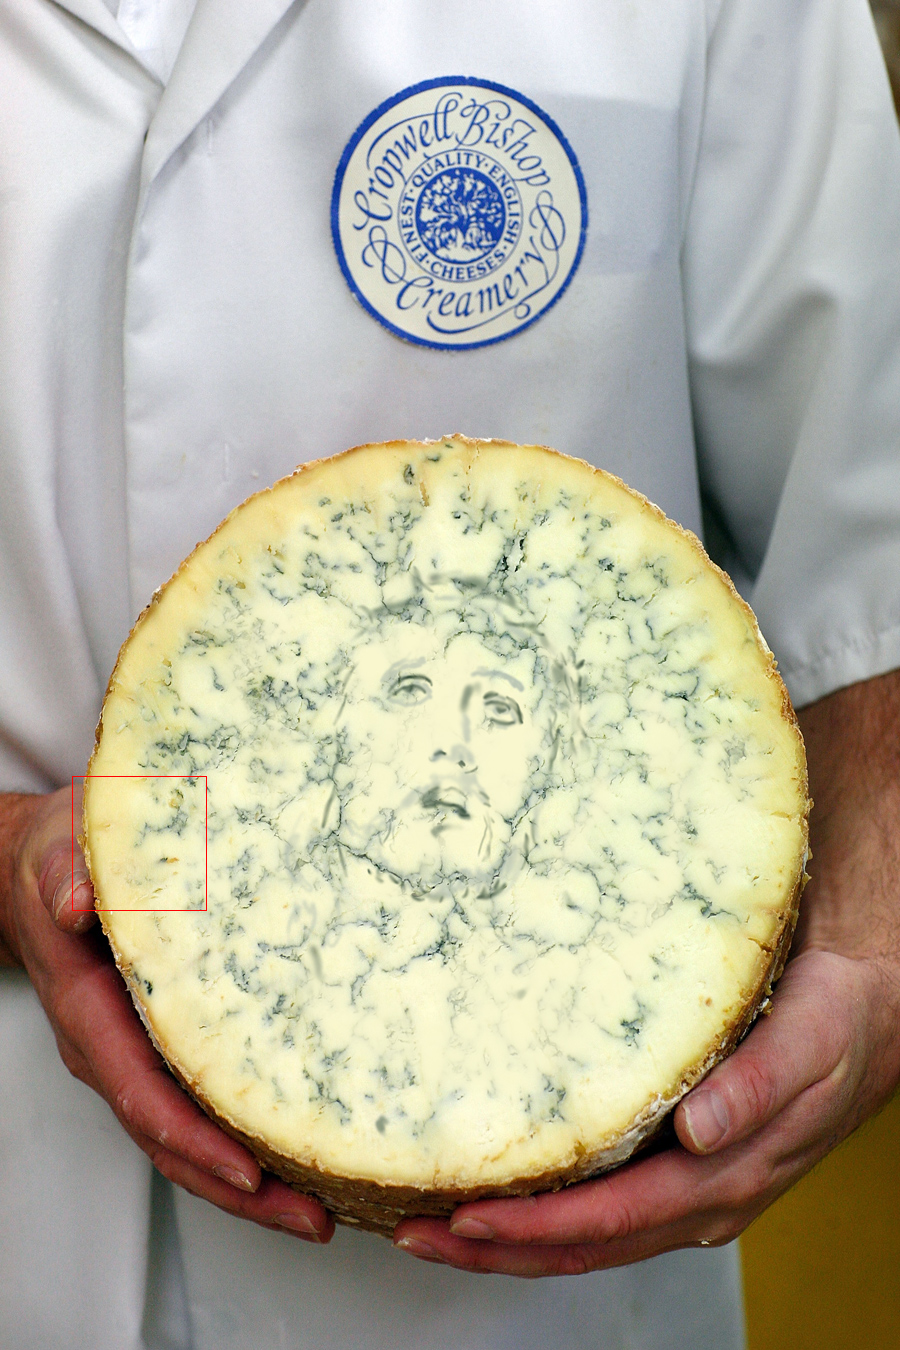

In [41]:
# example of face detection with opencv cascade classifier
# check opencv version
import cv2
from cv2 import imread
from google.colab.patches import cv2_imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
# load the photograph
pixels = imread('img74.jpg')
# load the pre-trained model
classifier = CascadeClassifier('/haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
#"top":189,"left":116,"height":208,"width":282
for box in bboxes:
	print(box)
x, y, width, height = box
x2, y2 = x + width, y + height
# draw a rectangle over the pixels
rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
cv2_imshow(pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

In [6]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.7MB/s 


[47, 45, 144, 209]


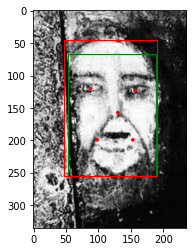

[106, -12, 429, 489]


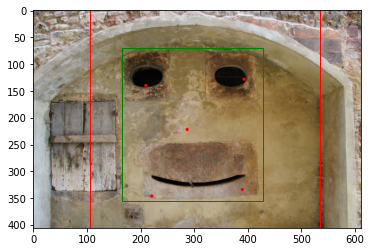

[25, 48, 172, 242]
[214, 62, 228, 288]


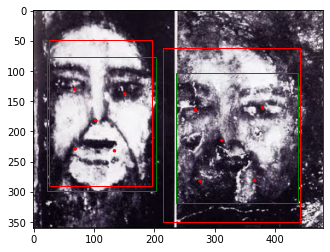

[187, 20, 194, 241]
[213, 257, 39, 55]


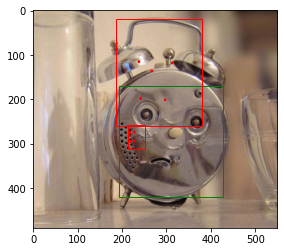

[166, 77, 95, 119]


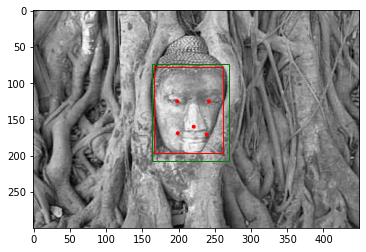

[85, 111, 94, 107]


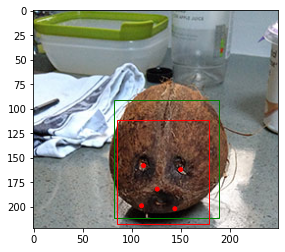

[74, 71, 185, 224]


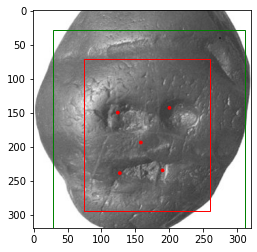

[3169, 2634, 31, 38]
[935, 110, 37, 47]


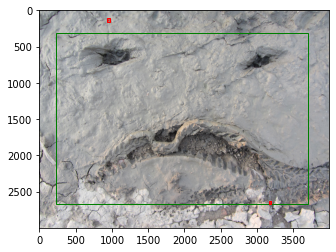

[338, 134, 89, 111]


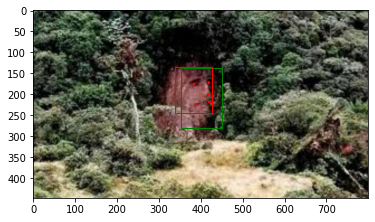

[0, 354, 17, 22]


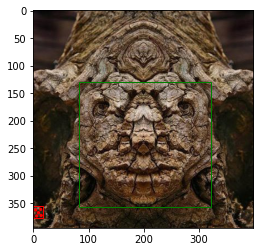

[637, 16, 17, 18]


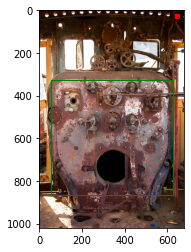

[263, 30, 181, 216]


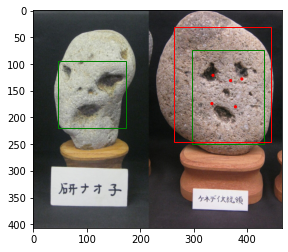

[347, 608, 199, 261]
[318, 545, 52, 64]
[681, 1065, 20, 25]


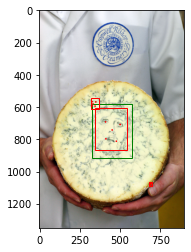

[192, 144, 181, 216]


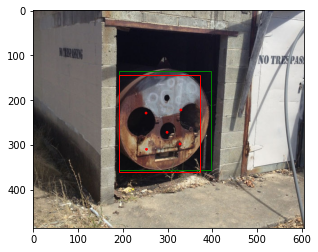

[233, 49, 643, 819]


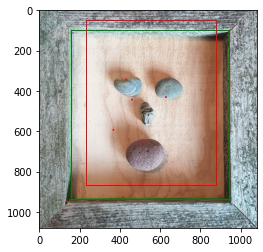

[356, 515, 27, 35]


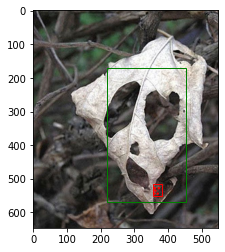

[1579, 2830, 18, 24]
[292, 3031, 28, 37]
[937, 747, 17, 25]
[2340, 3811, 23, 35]


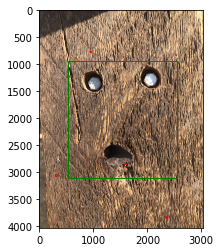

In [22]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Circle
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list, true):
	# load the image
  data = pyplot.imread(filename)
	# plot the image
  pyplot.imshow(data)
	# get the context for drawing boxes
  ax = pyplot.gca()
  for res in true:
    x = res[0]
    y = res[1]
    width = res[2]
    height = res[3]
    rect = Rectangle((x, y), width, height, fill=False, color='green')
    ax.add_patch(rect)
  for result in result_list:
    print(result['box'])
    x, y, width, height = result['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)
    for key, value in result['keypoints'].items(): # create and draw dot
      dot = Circle(value, radius=2, color='red')
      ax.add_patch(dot)
  pyplot.savefig('fin'+filename, dpi=350)
  pyplot.show()
def read_images(filename, true):
  pixels = pyplot.imread(filename)
  detector = MTCNN()
  faces = detector.detect_faces(pixels)
  if len(faces) > 0:
    draw_image_with_boxes(filename, faces, true)
for x in thisdict:
  read_images(x, thisdict[x])

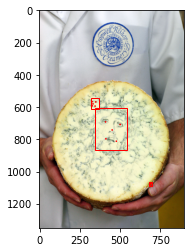

In [20]:

# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = 'img74.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)